### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-12-09/triple/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241209$IHNY$25^AActrl$25^pys 0.01$25^pys 0.03$25^pys 0.05$triple.txt
20241209$IHNY$25^pk30 phosctrl$25^pk30 0.01$25^pk30 0.03$25^pk30 0.05$triple.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)
        df = plotting.get_df_from_file(root + file,
                                       skip=2)

        # clean the df
        if "single" in file:
            print("cleaning single")
            df = plotting.clean_single(df)
        elif "triple" in root:
            print("cleaning triple")
            df = plotting.clean_triple(df)
        else:
            raise ValueError("Unknown type of experiment")
        
        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[2:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

20241209$IHNY$25^AActrl$25^pys 0.01$25^pys 0.03$25^pys 0.05$triple.txt
cleaning triple
20241209$IHNY$25^pk30 phosctrl$25^pk30 0.01$25^pk30 0.03$25^pk30 0.05$triple.txt
cleaning triple


,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,TOTAL WORK,TOUGHNESS,Name
0,1.0,4453.1,76.0,80.8,70.2,3.784000e+09,57.07,3.32,0.01263,57.85,...,0.01323,0.004007,28.90,3.643,55.81,91.40,0.02052,0.010900,81350000.0,AActrl
1,2.0,5144.7,85.4,102.9,63.7,3.873000e+09,66.88,2.90,0.01209,63.58,...,0.01279,0.004496,28.12,3.385,54.63,91.30,0.01775,0.011290,72240000.0,AActrl
2,3.0,3410.2,71.1,87.6,49.6,4.544000e+09,52.18,2.87,0.01343,46.60,...,0.01400,0.003307,25.67,2.616,49.95,64.95,0.01905,0.007397,71650000.0,AActrl
3,4.0,3855.5,82.2,105.8,46.4,4.731000e+09,61.30,3.03,0.01491,58.16,...,0.01548,0.004118,23.48,2.915,45.24,76.60,0.01987,0.008151,69710000.0,AActrl
4,5.0,3899.6,70.6,78.2,63.5,3.938000e+09,52.02,3.09,0.01241,50.34,...,0.01326,0.003479,29.51,3.438,57.43,84.15,0.02158,0.010060,85730000.0,AActrl


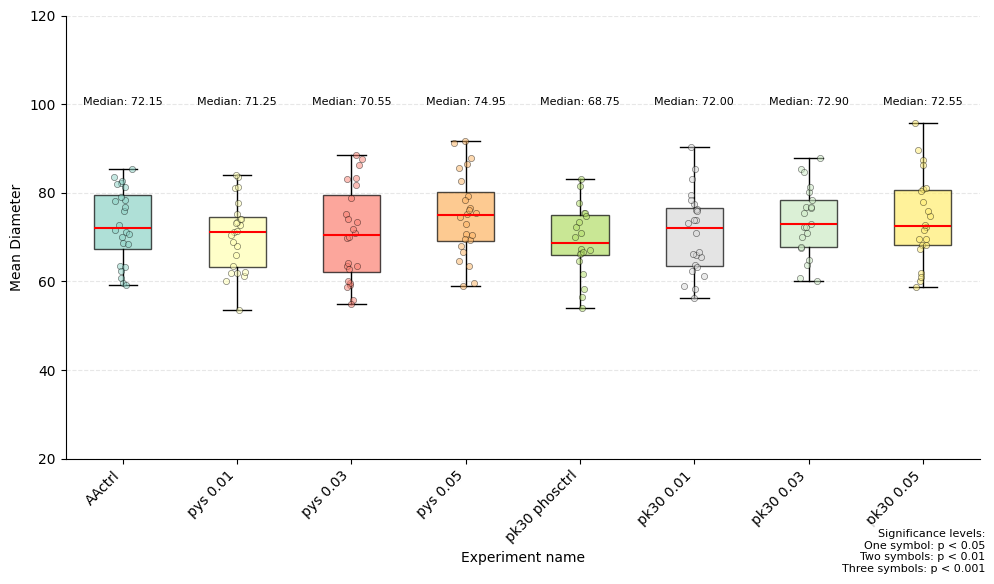

In [7]:
header = 'MEAN DIAMETER'
ymin = 20
ymax = 120
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between pys 0.01 and pk30 0.05: p = 0.0268


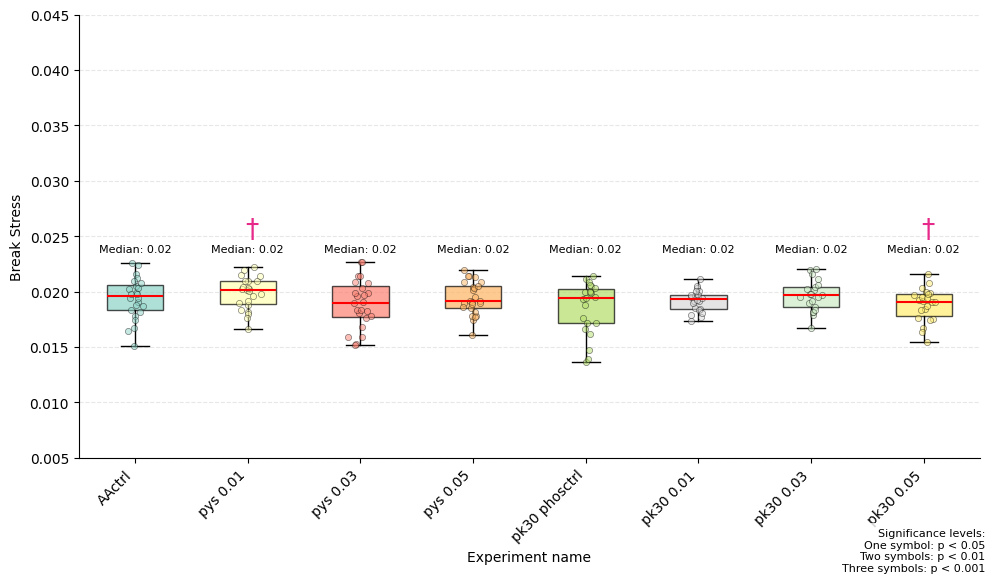

In [8]:
header = 'BREAK STRESS'
ymin = 0.005
ymax = 0.045
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

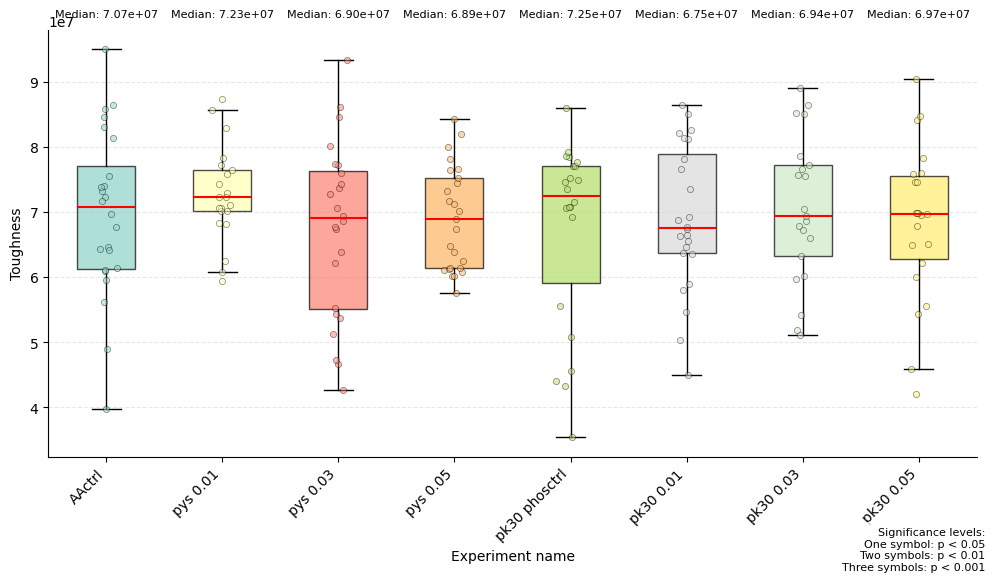

In [9]:
header = 'TOUGHNESS'
ymin = None
ymax = None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between pys 0.01 and pys 0.05: p = 0.0489


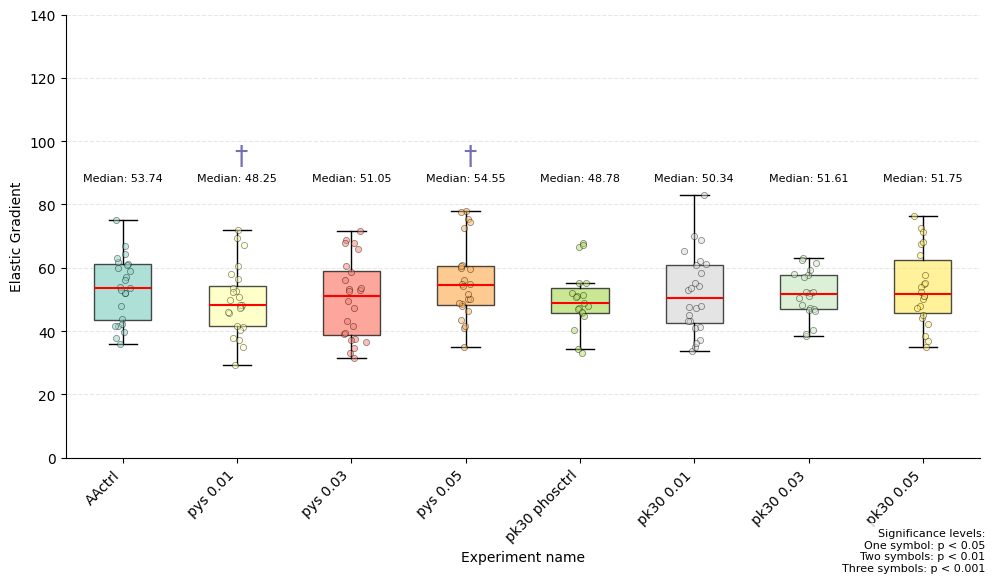

In [10]:
header = 'ELASTIC GRADIENT'
ymin = 0
ymax =  140
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between pys 0.01 and pk30 0.01: p = 0.0152
Statistical significance between pys 0.03 and pk30 0.01: p = 0.0094
Statistical significance between pys 0.05 and pk30 0.01: p = 0.0302
Statistical significance between pk30 0.01 and pk30 0.03: p = 0.0097
Statistical significance between pk30 0.01 and pk30 0.05: p = 0.0119


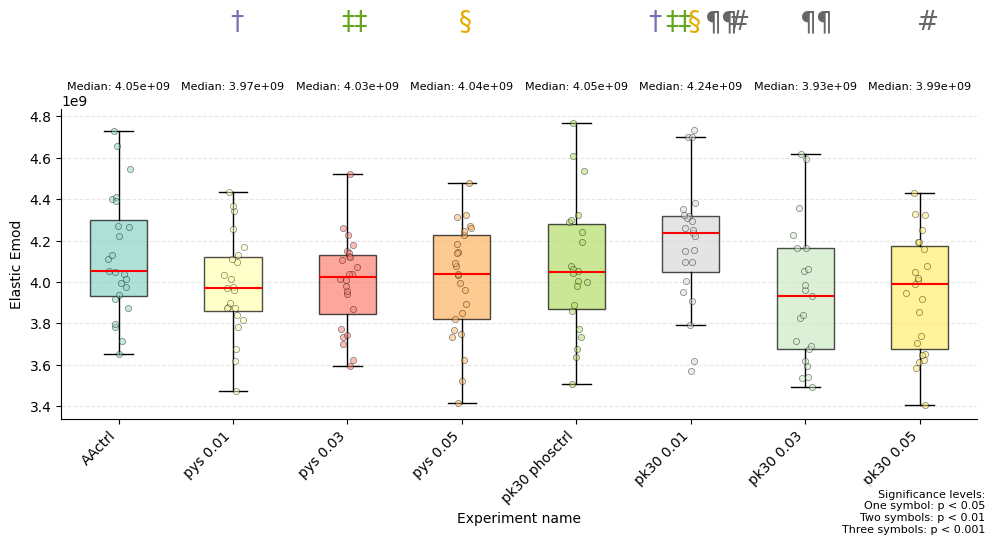

In [11]:
header = 'ELASTIC EMOD'
ymin = None
ymax =  None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()